In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn import metrics

In [ ]:
#1-load data from the Iris.csv file
data = pd.read_csv("Iris.csv")
data = data.reset_index()

In [ ]:
data.head(10)

,index,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
data.shape

(150, 7)

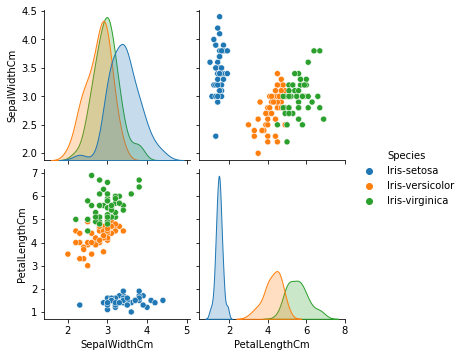

In [ ]:
sns.pairplot( data=data, vars=('SepalWidthCm','PetalLengthCm'), hue='Species' )

## from these graphs we can see that there is few Noisy data(around 3 records)

In [ ]:
target = data[['Species']].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],['0','1','2'])
data = pd.concat([data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']], target], axis=1)

In [ ]:
data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


lets say that:
<br>
**0 is train**
<br>
**1 is test**
<br>

the idea here is to go through all the records in the dataset and for each record we flip a coin if it is 0 then that record goes to the train dataset if it is 1 then the record goes to the test dataset but the coin want be fair it will be a magic coin where the probability of getting 0 is 70% and getting 1 is 30%.

In [ ]:
train_data = pd.DataFrame()
test_data = pd.DataFrame()
for i in range(len(data)):
  c= random.choices(population=[0,1],weights=[70,30],k=1)
  if c[0]==0:
    train_data=train_data.append(data.loc[i])
  else:
    test_data=test_data.append(data.loc[i])
train_data['Species'] = train_data['Species'].astype(int)
test_data['Species'] = test_data['Species'].astype(int)

In [ ]:
print(len(test_data))
print(len(train_data))


48
102


In [ ]:
test_data.head(10)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,4.9,3.0,1.4,0.2,0
4,5.0,3.6,1.4,0.2,0
11,4.8,3.4,1.6,0.2,0
12,4.8,3.0,1.4,0.1,0
16,5.4,3.9,1.3,0.4,0
18,5.7,3.8,1.7,0.3,0
21,5.1,3.7,1.5,0.4,0
22,4.6,3.6,1.0,0.2,0
23,5.1,3.3,1.7,0.5,0
26,5.0,3.4,1.6,0.4,0


In [ ]:
train_data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0
10,5.4,3.7,1.5,0.2,0
13,4.3,3.0,1.1,0.1,0


In [ ]:
trainX = train_data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
trainY=train_data.Species

In [ ]:
testX= test_data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
testY =test_data.Species

In [ ]:
clf = MLPClassifier(solver='lbfgs',epsilon=0.07, max_iter=150)

In [ ]:
clf.fit(trainX, trainY)

MLPClassifier(epsilon=0.07, max_iter=150, solver='lbfgs')

In [ ]:
prediction = clf.predict(testX)
print(prediction)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 1 1 1 1 2 2 2 2 2 2 2 2 2 2 1 2
 1 1 1 2 2 2 2 2 2 2 2]


In [ ]:
print('The accuracy is:',metrics.accuracy_score(prediction,testY))

The accuracy is: 0.8958333333333334


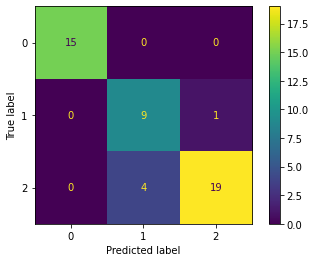

In [ ]:
cm = metrics.confusion_matrix(testY, prediction, labels=clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()


In [ ]:
clf = MLPClassifier(solver='lbfgs',learning_rate='constant', learning_rate_init=0.7,epsilon=0.07, max_iter=150)
clf.fit(trainX, trainY)


MLPClassifier(epsilon=0.07, learning_rate_init=0.7, max_iter=150,
              solver='lbfgs')

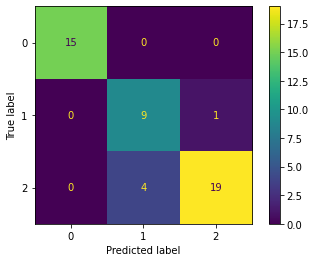

In [ ]:
clf = MLPClassifier(solver='lbfgs',learning_rate='constant', learning_rate_init=0.7,epsilon=0.07, max_iter=9500)
clf.fit(trainX, trainY)
prediction = clf.predict(testX)
cm = metrics.confusion_matrix(testY, prediction, labels=clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

this phenomenon is known by Overfitting.<br>
in order to avoid Overfitting we can:

1.   Train with more data.
2.   pause the model's training before memorizing noise and random fluctuations from the data.
3. ...



##Recurrent Neural Network (RNN)

In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,LSTM,BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

read the dataset<br>
skip first row(header)<br>
skip the id col<br>

In [80]:
df = pd.read_csv('Iris.csv',header = None,skiprows=1)
X = np.array(df.iloc[:,df.columns!=5])
Y = np.array(df.iloc[:,df.columns==5])
X = X[:,1:]
Y

array([['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-se

In [70]:
X = X.reshape(X.shape+(1,))

encode the classes:<br>


*   Iris-setosa -> 0
*   Iris-versicolor -> 1
*   Iris-virginica -> 2


In [71]:
labelEncode = LabelEncoder()
ty = labelEncode.fit_transform(Y)
print(ty)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [72]:
y = np_utils.to_categorical(ty)
print(y[:5])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


split the dataset to 80% for training and 20% for validation

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.2)
test_x 

**train the model**.<br>
for the feedback connections i am using LSTM (Long short-term memory: cell can process data sequentially and keep its hidden state through time.).


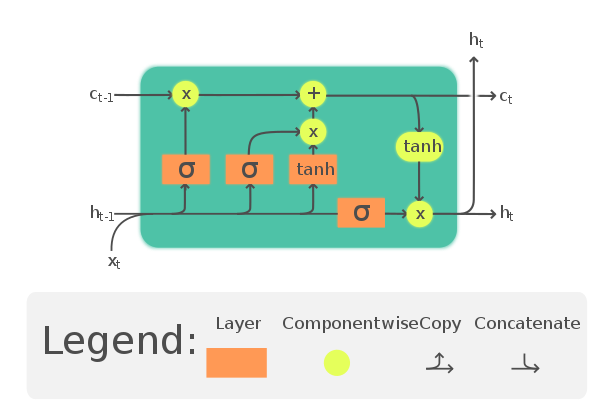

In [74]:
model = Sequential()
model.add(BatchNormalization())
model.add(LSTM(4))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_x, train_y, epochs=150,validation_data=(test_x,test_y),verbose=1)
model.summary()

Epoch 1/150
4/4 [==============================] - 4s 302ms/step - loss: 1.0720 - accuracy: 0.2750 - val_loss: 1.1001 - val_accuracy: 0.3000
Epoch 2/150
4/4 [==============================] - 0s 12ms/step - loss: 1.0686 - accuracy: 0.2500 - val_loss: 1.1001 - val_accuracy: 0.1667
Epoch 3/150
4/4 [==============================] - 0s 13ms/step - loss: 1.0653 - accuracy: 0.2417 - val_loss: 1.0999 - val_accuracy: 0.1667
Epoch 4/150
4/4 [==============================] - 0s 12ms/step - loss: 1.0622 - accuracy: 0.2583 - val_loss: 1.0998 - val_accuracy: 0.3333
Epoch 5/150
4/4 [==============================] - 0s 11ms/step - loss: 1.0613 - accuracy: 0.3583 - val_loss: 1.0995 - val_accuracy: 0.3667
Epoch 6/150
4/4 [==============================] - 0s 16ms/step - loss: 1.0564 - accuracy: 0.4250 - val_loss: 1.0992 - val_accuracy: 0.3667
Epoch 7/150
4/4 [==============================] - 0s 12ms/step - loss: 1.0586 - accuracy: 0.4667 - val_loss: 1.0987 - val_accuracy: 0.3667
Epoch 8/150
4/4 [==

In [75]:
model.
_, accuracy = model.evaluate(test_x, test_y)
print('Accuracy: %.2f' % (accuracy*100))

1/1 [==============================] - 0s 21ms/step - loss: 0.4555 - accuracy: 0.7333
Accuracy: 73.33


RNN is mainly used for:

*   Sequence Classification
*   Sequence Labelling
*   Sequence Generation<br>

and none of them is our case so using an RNN is not interesting at all.<br>
and since our data is not a time series data then there is no point of using RNNs.